In [263]:
# General Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Decision tree and random forest
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [176]:
## Dictionary

# Survival: 0 = no | 1 = yes
# Pclass: 1 = 1st (Upper class) | 2 = 2nd (Middle class) | 3 = 3rd (Low class) 
# sibSp: number of siblings/spouses aboard
# parch: number of parents/children aboard
# Embarked: C = Cherbourg | Q = Queenstown | S = Southampton

In [177]:
df = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [178]:
# Fix gender to be 0 for male and 1 for female
df.loc[df.Sex == 'male', 'Gender'] = 0 
df.loc[df.Sex == 'female', 'Gender'] = 1
df = df.drop(columns=['Name', 'Ticket', 'Sex', 'Cabin', 'Embarked'])

df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,0.0
1,2,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,26.0,0,0,7.9250,1.0
3,4,1,1,35.0,1,0,53.1000,1.0
4,5,0,3,35.0,0,0,8.0500,0.0


In [179]:
# Get rid of NaN elements
ageSet = df['Age']

high = int(ageSet.mean())
low = int(ageSet.std())

df['Age'] = df['Age'].fillna(df['Age'].apply(lambda v: random.randrange(low, high)))
print('Number of Non-empty cell in "Age" column:', df['Age'].isnull().value_counts()[0])

Number of Non-empty cell in "Age" column: 891


In [180]:
# Get rid of NaN elements
fareNulls = df['Fare'].isnull()
print(fareNulls.value_counts())
print()
print('Most frequent value: ', df['Fare'].mode()[0])

False    891
Name: Fare, dtype: int64

Most frequent value:  8.05


In [181]:
# Start Training
Y_train = df['Survived']
X_train = df.drop(['Survived'], axis=1).values

In [182]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

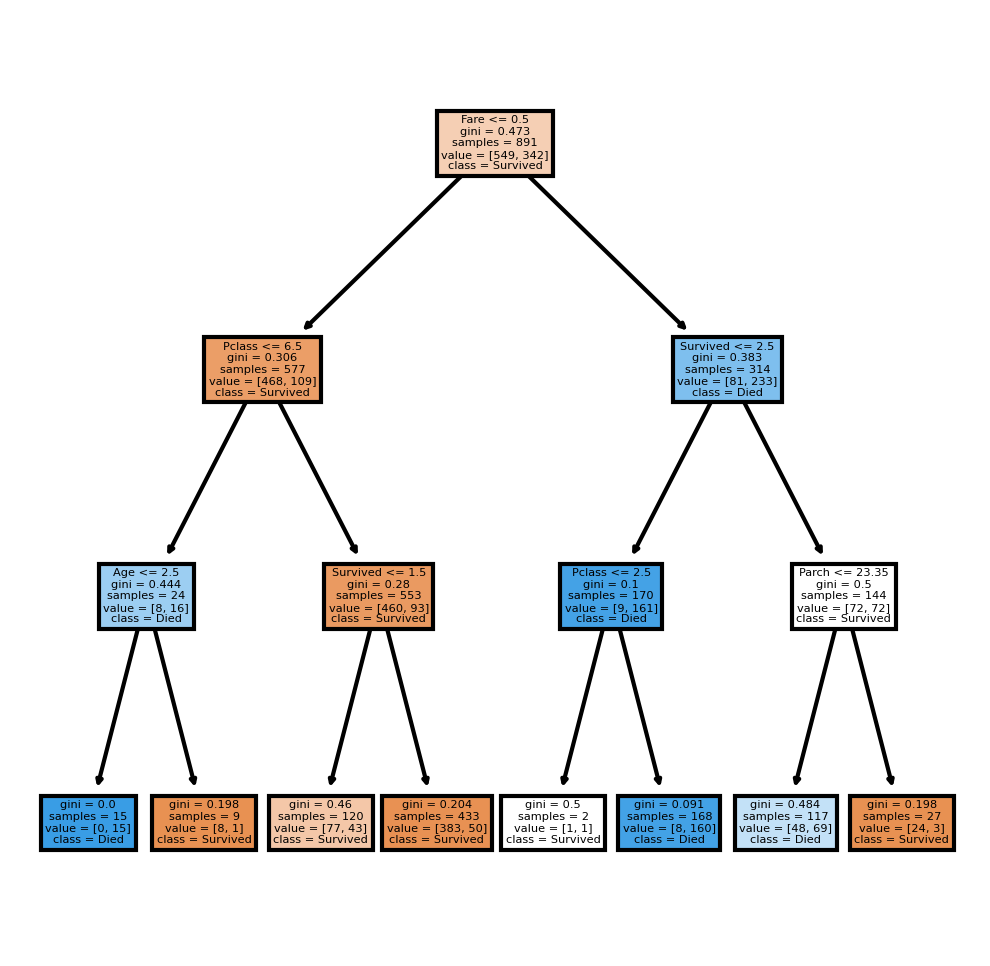

In [183]:
# Plot decision tree
featureNames = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Gender']
classNames = ['Survived', 'Died']
fig, axes = plt.subplots(nrows = 1 , ncols = 1 , figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = featureNames, 
               class_names= classNames,
               filled = True);
fig.savefig('imagename.png')

In [285]:
# Five fold cross on dec tree
crossVal = KFold(5)
scores = cross_val_score(dt, X_train, Y_train, scoring='accuracy', cv=crossVal)
print('Five-fold cross validation on decision tree: ', np.mean(scores) * 100)

Five-fold cross validation on decision tree:  80.24543343167409


In [284]:
# Five fold cross on rand forest
randomForest = RandomForestClassifier(max_depth=3)
randomForest.fit(X_train, Y_train)
scores = cross_val_score(randomForest, X_train, Y_train, scoring='accuracy', cv=crossVal)
print('Five-fold cross validation on random forest:', np.mean(scores) * 100)

Five-fold cross validation on random forest: 79.91525955683886
